In [1]:
#Determine whether or not a correlation exists between the number of dependents and three additional
#attributes referring to returns: number of single returns, number of joint returns, and total number
#of returns.

#Identify zip codes of densely populated areas (cities, towns, etc.) vs. sparsely populated areas (rural, suburban, etc).

#Discover whether certain zip code produce higher adjusted gross income and 
#whether a community’s density implies its income and vice versa.


In [38]:
import pandas as pd
import numpy as np
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
import matplotlib.pyplot as plt
import matplotlib.lines as pltline
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
import scipy.cluster.vq as vq
from scipy.cluster.vq import kmeans, kmeans2, vq
import pylab
from collections import defaultdict
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
import statsmodels.api as sm

In [3]:
df = pd.read_csv('zcta2010.csv')
df = df.iloc[131:668]
df = df.drop(['Unnamed: 9'], axis=1)
df = df.drop(['Unnamed: 10'], axis=1)
df

,ZCTA5,LANDSQMT,WATERSQMT,LANDSQMI,WATERSQMI,POPULATION,HSGUNITS,INTPTLAT,INTPTLON
131,1001,29635470,2229770,11.44,0.86,"16,769","7,557",42.062332,-72.628274
132,1002,142556362,4280260,55.04,1.65,"29,049","10,388",42.363977,-72.458507
133,1003,1842384,12788,0.71,0.00,"10,372",5,42.389941,-72.524108
134,1005,114586903,667042,44.24,0.26,"5,079","2,044",42.418848,-72.106598
135,1007,136345999,6943853,52.64,2.68,"14,649","5,839",42.279010,-72.400468
136,1008,139331467,5086093,53.80,1.96,"1,263",586,42.191846,-72.957325
137,1009,2065002,23,0.80,0.00,741,341,42.211969,-72.341433
138,1010,89982811,1420260,34.74,0.55,"3,609","1,598",42.129477,-72.205302
139,1011,81884563,342573,31.62,0.13,"1,370",659,42.300281,-72.968716
140,1012,33977749,545075,13.12,0.21,661,343,42.375425,-72.858192


In [4]:
df2 = pd.read_csv("MAZip.csv")

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
a = 112
for i in range(144):
    num = a + i
    string = 'Unnamed: ' + str(num)
    df2 = df2.drop([string], axis=1)


In [6]:
df2.head(20)

,ZIP code,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Adjusted gross income (AGI) [2],...,Total tax liability [8],Unnamed: 103,Additional Medicare tax,Unnamed: 105,Net investment income tax,Unnamed: 107,Tax due at time of filing [9],Unnamed: 109,Overpayments refunded [10],Unnamed: 111
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount
1,NaN,NaN,(1),(2),(3),(4),(5),(6),(7),(8),...,(101),(102),(103),(104),(105),(106),(107),(108),(109),(110)
2,1001,NaN,"8,780","4,750","3,030",870,"4,970","15,140","4,000","471,936",...,"7,020","52,452",50,50,50,79,"1,490","4,348","6,910","16,058"
3,1001,"$1 under $25,000",2910,2280,310,290,1440,3190,610,34348,...,1390,1183,0,0,0,0,270,221,2360,3328
4,1001,"$25,000 under $50,000",2190,1330,510,300,1230,3630,940,81307,...,1980,5775,0,0,0,0,300,436,1860,4167
5,1001,"$50,000 under $75,000",1520,730,600,160,920,2860,750,93311,...,1490,9079,0,0,0,0,300,676,1200,3163
6,1001,"$75,000 under $100,000",910,230,600,70,560,2140,630,78687,...,910,8295,0,0,0,0,190,454,710,2186
7,1001,"$100,000 under $200,000",1120,160,910,50,730,2980,950,145586,...,1120,19668,0,0,0,0,360,1413,730,2897
8,1001,"$200,000 or more",130,20,100,**,90,340,120,38697,...,130,8452,50,50,50,79,70,1148,50,317
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
arr = []

for i in df2.index: 
    mod = (i - 10)%8
    if mod == 0:
        arr.append(df2.iloc[i])

In [8]:
d = defaultdict(list)
for i in range(3858): 
    mod = (i - 10)%8
    if mod == 0:
        zip1 = int(df2.iloc[i][0])
        d[zip1] = {}
        d[zip1]["dependents"] = locale.atoi(df2.iloc[i][8])    #number of dependents
        d[zip1]["returns"] = locale.atoi(df2.iloc[i][2])       #number of returns
        d[zip1]["joint"] = locale.atoi(df2.iloc[i][3])         #number of joint returns
        d[zip1]["single"] = locale.atoi(df2.iloc[i][4])        #number of single return
        d[zip1]["income"] = locale.atoi(df2.iloc[i][11])       #total income

In [9]:
d

defaultdict(list,
            {1001: {'dependents': 4000,
              'income': 477601,
              'joint': 4750,
              'returns': 8780,
              'single': 3030},
             1002: {'dependents': 4440,
              'income': 762298,
              'joint': 5140,
              'returns': 9570,
              'single': 3530},
             1005: {'dependents': 1240,
              'income': 129645,
              'joint': 1050,
              'returns': 2230,
              'single': 980},
             1007: {'dependents': 4210,
              'income': 489020,
              'joint': 3350,
              'returns': 7300,
              'single': 3280},
             1008: {'dependents': 290,
              'income': 38867,
              'joint': 280,
              'returns': 640,
              'single': 320},
             1010: {'dependents': 1000,
              'income': 132147,
              'joint': 860,
              'returns': 1890,
              'single': 870},
            

In [10]:
arr[1]

ZIP\rcode                                                      1002
Size of adjusted gross income                                   NaN
Number of returns                                             9,570
Number of single returns                                      5,140
Number of joint returns                                       3,530
Number of head of household returns                             770
Number with paid preparer's signature                         4,750
Number of exemptions                                         16,590
Number of dependents                                          4,440
Adjusted gross income (AGI) [2]                             744,429
Total income                                                  9,570
Unnamed: 11                                                 762,298
Salaries and wages in AGI                                     7,670
Unnamed: 13                                                 433,388
Taxable interest                                

In [11]:
df.iloc[0]['ZCTA5']

1001

In [12]:
#Create array of values to cluster
x = []
y = []
clusters = []
for i in range(537):
    x1 = df.iloc[i]['INTPTLON']
    y1 = df.iloc[i]['INTPTLAT']
    #y1 = locale.atoi(y1)
    if x1 == 0:
        continue
    else:
        #x1 = 100000/float(x1)     #Since we are looking for urban places, plotting population inversely against 
        x.append(x1)              #land area will allow us to plot a graph according to density
        y.append(y1)
        clusters.append([x1, y1])

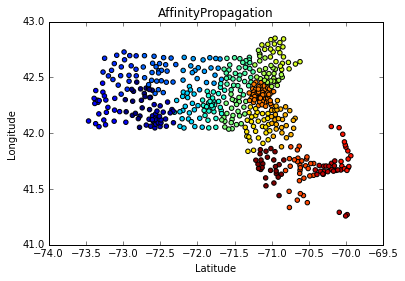

In [26]:
#AffinityPropagation
y_pred = sklearn.cluster.AffinityPropagation().fit_predict(clusters)

plt.scatter(x, y, c=y_pred)
plt.title("AffinityPropagation")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
#plt.xlim([-71,-69])

In [27]:
df["CLUSTER"] = y_pred    

In [28]:
arr2 = [None]*19

for i in range(537):
    num = df.iloc[i]["CLUSTER"]
    zipC = df.iloc[i]["ZCTA5"]
    
    if arr2[num] == None:
        arr2[num] = [zipC]
    else:
        arr2[num].append(zipC)


In [29]:
#for each cluster of zip codes
#find the number of dependents per person per group
totals = []
avrgs = []
for i in range(19):
    length = len(arr2[i])
    dependents = 0
    returns = 0
    joint = 0
    single = 0
    income = 0
    for j in range(length):    #within each cluster group, for each zip code
        zip1 = int(arr2[i][j])
        if d[zip1] != []:
            dependents += d[zip1]["dependents"]
            returns += d[zip1]["returns"]
            joint += d[zip1]["joint"]
            single += d[zip1]["single"]
            income += d[zip1]["income"]
    totals2 = [returns, dependents, joint, single, income]
    avrgs2 = [returns/float(length), dependents/float(length), joint/float(length), single/float(length), income/float(length)]
    totals.append(totals2)
    avrgs.append(avrgs2)

In [30]:
totals

[[73890, 36760, 38510, 25850, 4307696],
 [177540, 106160, 88020, 58210, 9747323],
 [39190, 17510, 20560, 13680, 2285407],
 [26180, 11990, 13090, 10110, 1419438],
 [43830, 19590, 22920, 16410, 2618904],
 [95250, 54690, 45680, 36590, 5552869],
 [54230, 29920, 25720, 21400, 3146453],
 [185990, 109530, 92560, 65640, 12107492],
 [218140, 137090, 103270, 90650, 23018563],
 [186360, 113230, 88160, 80020, 17161086],
 [419230, 239100, 213170, 147970, 30190145],
 [133750, 69910, 67220, 53030, 11856702],
 [265190, 160600, 129170, 102900, 22113560],
 [208990, 121660, 103310, 84120, 17830127],
 [757490, 349450, 447530, 214290, 81815578],
 [102260, 47210, 51360, 40630, 7304581],
 [23180, 7060, 12570, 8660, 1592080],
 [50810, 19150, 27320, 17720, 3275141],
 [155860, 84730, 77490, 54080, 8216032]]

In [31]:
avrgs

[[3212.608695652174,
  1598.2608695652175,
  1674.3478260869565,
  1123.9130434782608,
  187291.13043478262],
 [5918.0, 3538.6666666666665, 2934.0, 1940.3333333333333, 324910.76666666666],
 [1703.9130434782608,
  761.304347826087,
  893.9130434782609,
  594.7826086956521,
  99365.52173913043],
 [1246.6666666666667,
  570.952380952381,
  623.3333333333334,
  481.42857142857144,
  67592.28571428571],
 [1753.2, 783.6, 916.8, 656.4, 104756.16],
 [4535.714285714285,
  2604.285714285714,
  2175.2380952380954,
  1742.3809523809523,
  264422.3333333333],
 [2259.5833333333335,
  1246.6666666666667,
  1071.6666666666667,
  891.6666666666666,
  131102.20833333334],
 [5812.1875, 3422.8125, 2892.5, 2051.25, 378359.125],
 [6415.882352941177,
  4032.0588235294117,
  3037.3529411764707,
  2666.176470588235,
  677016.5588235294],
 [7454.4, 4529.2, 3526.4, 3200.8, 686443.44],
 [13523.548387096775,
  7712.903225806452,
  6876.451612903225,
  4773.225806451613,
  973875.6451612903],
 [5815.217391304348,
 

In [32]:
#Mean, stdDev, Median of dependents[1] and joint returns[2]

depends = []
jreturns = []

for i in range(19):
    divide = totals[i][0]
    depends.append(avrgs[i][1])
    jreturns.append(avrgs[i][2])


print ("For dependents:")
print "Mean: ", np.mean(depends)
print "StdDev: ", np.std(depends)
print "Median: ", np.median(depends)

print ("\nFor joint returns:")
print "Mean: ", np.mean(jreturns)
print "StdDev: ", np.std(jreturns)
print "Median: ", np.median(jreturns)


For dependents:
Mean:  2870.13173884
StdDev:  1924.61205187
Median:  3039.56521739

For joint returns:
Mean:  2653.46550744
StdDev:  1689.61767721
Median:  2892.5


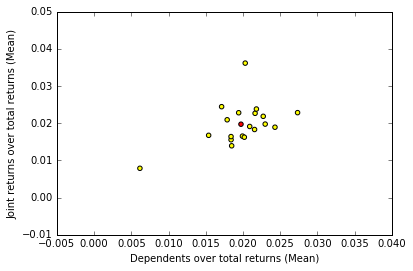

In [49]:
#total dependents per return vs total joint returns per return
x = []
y = []
for i in range(19):
    divide = totals[i][0]
    x1 = avrgs[i][1]
    x1 = x1/float(divide)
    y1 = avrgs[i][2]
    y1 = y1/float(divide)
    x.append(x1)
    y.append(y1)

a = (np.mean(x))
x.append(a)
b = (np.mean(y))
y.append(b)

c = []
for i in range(19):
    inte = int(i)
    c.append("yellow")
c.append("red")

plt.scatter(x,y, c=c)
plt.xlabel("Dependents over total returns (Mean)")
plt.ylabel("Joint returns over total returns (Mean)")


In [52]:
#Identifies the communites that are economically unstable
for i in range(len(x)):
    if x[i] > a and y[i] < b:
        print(i)

1
9
12
13
18


In [56]:
print(arr2[1])    #Urban area comprising of Belchertown and Agawam
print(arr2[9])    #Urban area between Worcester and Providence (not inclusive)
print(arr2[12])   #Urban area between Framingham and Brockton (not inclusive)
print(arr2[13])   #Urban area south of Boston, Massachusetts Bay Area
print(arr2[18])   #Urban area North-west of Providence and New Bedford (not inclusive)

[1001, 1007, 1009, 1013, 1020, 1022, 1028, 1030, 1033, 1036, 1056, 1057, 1075, 1079, 1080, 1089, 1095, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1118, 1119, 1128, 1129, 1151, 1199]
[1504, 1525, 1529, 1534, 1568, 1569, 1581, 1588, 1701, 1702, 1721, 1745, 1746, 1747, 1748, 1752, 1756, 1757, 1760, 1770, 1772, 2019, 2038, 2053, 2054]
[2021, 2030, 2032, 2035, 2048, 2052, 2056, 2062, 2067, 2071, 2072, 2081, 2090, 2093, 2301, 2322, 2356, 2357, 2368, 2375, 2379, 2703, 2760, 2762, 2763, 2766, 2767, 2769, 2771, 2780]
[2025, 2043, 2045, 2047, 2050, 2061, 2066, 2184, 2188, 2189, 2190, 2191, 2302, 2324, 2332, 2333, 2338, 2339, 2341, 2343, 2346, 2351, 2359, 2364, 2367, 2370, 2382]
[2347, 2702, 2713, 2715, 2717, 2718, 2719, 2720, 2721, 2723, 2724, 2725, 2726, 2740, 2743, 2744, 2745, 2746, 2747, 2748, 2764, 2770, 2777, 2779, 2790, 2791]


In [34]:
r = sm.OLS(y,sm.add_constant(x)).fit()
print (r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     5.763
Date:                Sat, 30 Apr 2016   Prob (F-statistic):             0.0281
Time:                        19:13:06   Log-Likelihood:                 74.596
No. Observations:                  19   AIC:                            -145.2
Df Residuals:                      17   BIC:                            -143.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0066      0.006      1.175      0.2

//anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


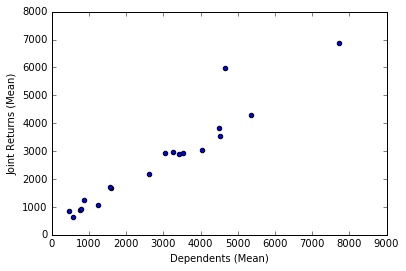

In [35]:
#total dependents vs total joint returns
x = []
y = []
for i in range(19):
    divide = totals[i][0]
    x1 = avrgs[i][1]
    x1 = x1
    y1 = avrgs[i][2]
    y1 = y1
    x.append(x1)
    y.append(y1)

plt.scatter(x,y)
plt.xlabel("Dependents (Mean)")
plt.ylabel("Joint Returns (Mean)")
# For dependents:
# Mean:  2870.13173884
# StdDev:  1924.61205187
# Median:  3039.56521739

# For joint returns:
# Mean:  2653.46550744

In [51]:
r = sm.OLS(y,sm.add_constant(x)).fit()
print (r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     185.1
Date:                Thu, 28 Apr 2016   Prob (F-statistic):           1.44e-10
Time:                        10:56:35   Log-Likelihood:                -144.66
No. Observations:                  19   AIC:                             293.3
Df Residuals:                      17   BIC:                             295.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        242.0874    213.411      1.134      0.2

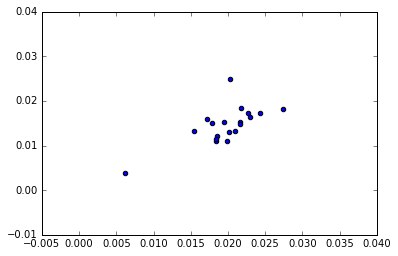

In [20]:
#total dependents per return vs total single returns per return
x = []
y = []
for i in range(19):
    divide = totals[i][0]
    x1 = avrgs[i][1]
    x1 = x1/float(divide)
    y1 = avrgs[i][3]
    y1 = y1/float(divide)
    x.append(x1)
    y.append(y1)

plt.scatter(x,y)

In [21]:
r = sm.OLS(x,sm.add_constant(y)).fit()
print (r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     16.27
Date:                Thu, 28 Apr 2016   Prob (F-statistic):           0.000863
Time:                        08:53:20   Log-Likelihood:                 83.538
No. Observations:                  19   AIC:                            -163.1
Df Residuals:                      17   BIC:                            -161.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0094      0.003      3.497      0.0

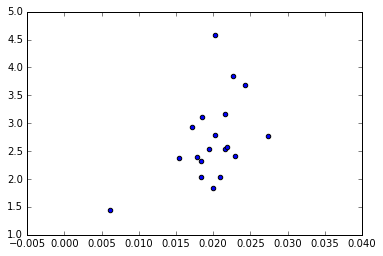

In [22]:
#total dependents per return vs total income returns per return
x = []
y = []
for i in range(19):
    divide = totals[i][0]
    x1 = avrgs[i][1]
    x1 = x1/float(divide)
    y1 = avrgs[i][4]
    y1 = y1/float(divide)
    x.append(x1)
    y.append(y1)

plt.scatter(x,y)

In [66]:
#for each cluster of zip codes
#find the number of dependents per person per group
depends2 = []
jreturns2 = []
for i in range(19):
    length = len(arr2[i])
    a = []
    b = []
    for j in range(length):    #within each cluster group, for each zip code
        zip1 = int(arr2[i][j])
        if d[zip1] != []:
            a.append(d[zip1]["dependents"])
            b.append(d[zip1]["returns"])
    med1 = np.median(a)
    med2 = np.median(b)
    depends2.append(med1)
    jreturns2.append(med2)
    


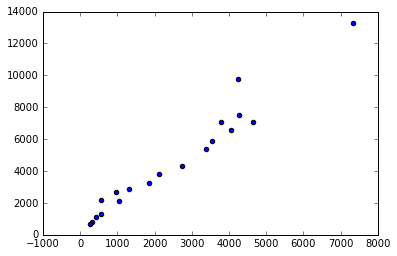

In [67]:
plt.scatter(depends2,jreturns2)

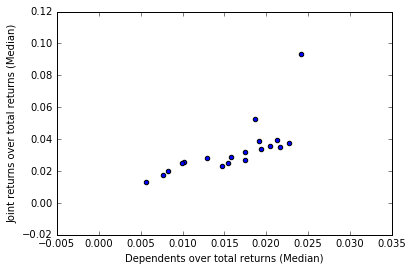

In [90]:
x = []
y = []
for i in range(19):
    divide = totals[i][0]
    x1 = depends2[i]
    x1 = x1/float(divide)
    y1 = jreturns2[i]
    y1 = y1/float(divide)
    x.append(x1)
    y.append(y1)

plt.scatter(x,y)
plt.xlabel("Dependents over total returns (Median)")
plt.ylabel("Joint returns over total returns (Median)")

In [79]:
r = sm.OLS(x,sm.add_constant(y)).fit()
print (r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     17.31
Date:                Thu, 28 Apr 2016   Prob (F-statistic):           0.000656
Time:                        11:45:48   Log-Likelihood:                 79.082
No. Observations:                  19   AIC:                            -154.2
Df Residuals:                      17   BIC:                            -152.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0084      0.002      4.121      0.0

In [15]:
arr2[16]

NameError: name 'arr2' is not defined